In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_arms = 10
n_runs = 2000
n_steps = 1000
epsilon = 0.1
c = 2

In [3]:
def getAvgRewards_greedy(epsilon):
    rewards = np.zeros((n_runs, n_steps))
    
    for run in range(n_runs):
        Values = np.zeros(n_arms)
        Q_true = np.random.randn(n_arms)
        action_counts = np.zeros(n_arms)
        
        for step in range(n_steps):
            greedy_action = np.argmax(Values)
            action = greedy_action
            if np.random.rand() < epsilon:
                # Explore
                while action == greedy_action:
                    action = np.random.randint(10)
            action_counts[action] += 1
            reward = np.random.normal(0, 1) + Q_true[action]
            rewards[run][step] = reward
            Values[action] += (reward - Values[action])/action_counts[action]
    return rewards.mean(axis=0)

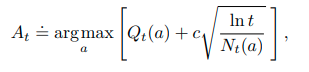

Screenshot from "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto


In [4]:
def getAvgRewards_ucb(c):
    rewards = np.zeros((n_runs, n_steps))
    
    for run in range(n_runs):
        Values = np.zeros(n_arms)
        Q_true = np.random.randn(n_arms)
        t = 0
        action_counts = np.zeros(n_arms)
        
        for step in range(n_steps):
            if np.any(action_counts == 0):
                action = np.where(action_counts == 0)[0][0]
            else:
                action = np.argmax(Values + c*np.sqrt(np.log(t)/action_counts))
            t += 1
            action_counts[action] += 1
            
            reward = np.random.normal(0, 1) + Q_true[action]
            rewards[run][step] = reward
            Values[action] += (reward - Values[action])/action_counts[action]
    return rewards.mean(axis=0)

In [5]:
greedy_rewards = getAvgRewards_greedy(0)

In [6]:
e_greedy_rewards = getAvgRewards_greedy(0.1)

In [7]:
ucb_rewards = getAvgRewards_ucb(2)

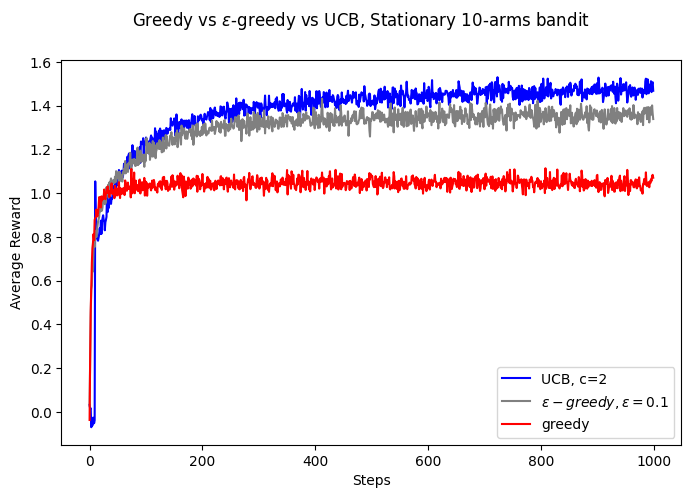

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
fig.suptitle("Greedy vs $\epsilon$-greedy vs UCB, Stationary 10-arms bandit")
ax.set_xlabel("Steps")
ax.set_ylabel("Average Reward")
ax.plot(ucb_rewards, label='UCB, c=2', c='blue')
ax.plot(e_greedy_rewards, label='$\epsilon-greedy, \epsilon=0.1$', c='grey')
ax.plot(greedy_rewards, label='greedy', c='red')
ax.legend()

In [9]:
fig.savefig("./Results", dpi=200)